In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Pandas
_______________________________________________________________________

# 1. Load data

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/kaggle/input/titaninic/titanic.txt', sep='\t', header = 0)
df

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",Female,14.5000,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1305,Third,"Zabour, Miss. Thamine",Female,NaN,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5000,0,0,2656,7.2250,NaN,Cherbourg,NaN,No
1307,Third,"Zakarian, Mr. Ortin",Male,27.0000,0,0,2670,7.2250,NaN,Cherbourg,NaN,No


# 2. Access data & Basic function

In [4]:
df.columns

Index(['Passenger Class', 'Name', 'Sex', 'Age',
       'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Ticket Number', 'Passenger Fare',
       'Cabin', 'Port of Embarkation', 'Life Boat', 'Survived'],
      dtype='object')

In [5]:
df.values

array([['First', 'Allen, Miss. Elisabeth Walton', 'Female', ...,
        'Southampton', '2', 'Yes'],
       ['First', 'Allison, Master. Hudson Trevor', 'Male', ...,
        'Southampton', '11', 'Yes'],
       ['First', 'Allison, Miss. Helen Loraine', 'Female', ...,
        'Southampton', nan, 'No'],
       ...,
       ['Third', 'Zakarian, Mr. Mapriededer', 'Male', ..., 'Cherbourg',
        nan, 'No'],
       ['Third', 'Zakarian, Mr. Ortin', 'Male', ..., 'Cherbourg', nan,
        'No'],
       ['Third', 'Zimmerman, Mr. Leo', 'Male', ..., 'Southampton', nan,
        'No']], dtype=object)

In [6]:
df['Name'] #see data in each column

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: Name, Length: 1309, dtype: object

In [7]:
df.iloc[:,3]

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: Age, Length: 1309, dtype: float64

In [8]:
df.loc[2,'Passenger Class':'Age']

Passenger Class                           First
Name               Allison, Miss. Helen Loraine
Sex                                      Female
Age                                         2.0
Name: 2, dtype: object

In [10]:
df.dtypes

Passenger Class                        object
Name                                   object
Sex                                    object
Age                                   float64
No of Siblings or Spouses on Board      int64
No of Parents or Children on Board      int64
Ticket Number                          object
Passenger Fare                        float64
Cabin                                  object
Port of Embarkation                    object
Life Boat                              object
Survived                               object
dtype: object

In [11]:
max(df['Age'])

80.0

In [12]:
np.argmax(df['Age'])

14

In [13]:
min(df['Age'])

0.1667

In [14]:
df[ df['Age']==df['Age'].min() ]

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
763,Third,"Dean, Miss. Elizabeth Gladys 'Millvina'",Female,0.1667,1,2,C.A. 2315,20.575,NaN,Southampton,10,Yes


In [15]:
df[ df['Age']==df['Age'].max() ]


,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
14,First,"Barkworth, Mr. Algernon Henry Wilson",Male,80.0,0,0,27042,30.0,A23,Southampton,B,Yes


In [16]:
df['Name'][ df['Age']==df['Age'].max() ]

14    Barkworth, Mr. Algernon Henry Wilson
Name: Name, dtype: object

In [17]:
df.shape

(1309, 12)

In [18]:
df['Sex']

0       Female
1         Male
2       Female
3         Male
4       Female
         ...  
1304    Female
1305    Female
1306      Male
1307      Male
1308      Male
Name: Sex, Length: 1309, dtype: object

In [19]:
df['Sex'].values 

array(['Female', 'Male', 'Female', ..., 'Male', 'Male', 'Male'],
      dtype=object)

In [20]:
df['Sex'].tolist()

['Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 '

In [21]:
df.columns

Index(['Passenger Class', 'Name', 'Sex', 'Age',
       'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Ticket Number', 'Passenger Fare',
       'Cabin', 'Port of Embarkation', 'Life Boat', 'Survived'],
      dtype='object')

In [22]:
df['Label'] = df['Age']>=23 
df

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived,Label
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes,True
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes,False
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No,False
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No,True
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",Female,14.5000,1,0,2665,14.4542,NaN,Cherbourg,NaN,No,False
1305,Third,"Zabour, Miss. Thamine",Female,NaN,1,0,2665,14.4542,NaN,Cherbourg,NaN,No,False
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5000,0,0,2656,7.2250,NaN,Cherbourg,NaN,No,True
1307,Third,"Zakarian, Mr. Ortin",Male,27.0000,0,0,2670,7.2250,NaN,Cherbourg,NaN,No,True


# 3. Check Missing Values

In [23]:
df.isnull()

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived,Label
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,True,False,True,False,False
1305,False,False,False,True,False,False,False,False,True,False,True,False,False
1306,False,False,False,False,False,False,False,False,True,False,True,False,False
1307,False,False,False,False,False,False,False,False,True,False,True,False,False


In [24]:
df.isnull().any()

Passenger Class                       False
Name                                  False
Sex                                   False
Age                                    True
No of Siblings or Spouses on Board    False
No of Parents or Children on Board    False
Ticket Number                         False
Passenger Fare                         True
Cabin                                  True
Port of Embarkation                    True
Life Boat                              True
Survived                              False
Label                                 False
dtype: bool

In [25]:
df['Age'].isnull().sum()

263

# 4. Remove Values

In [28]:
df_clean = df
df_clean = df_clean.drop('Cabin', 1) 
df_clean = df_clean.drop('Ticket Number', 1) 
df_clean.columns

Index(['Passenger Class', 'Name', 'Sex', 'Age',
       'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Passenger Fare',
       'Port of Embarkation', 'Life Boat', 'Survived', 'Label'],
      dtype='object')

In [29]:
df_clean = df_clean.dropna(1, 'any') 
df_clean.columns

Index(['Passenger Class', 'Name', 'Sex', 'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Survived', 'Label'],
      dtype='object')

In [30]:
df_clean = df_clean.dropna(0, 'any') 
df_clean.columns

Index(['Passenger Class', 'Name', 'Sex', 'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Survived', 'Label'],
      dtype='object')

In [31]:
df_clean.isnull().any()

Passenger Class                       False
Name                                  False
Sex                                   False
No of Siblings or Spouses on Board    False
No of Parents or Children on Board    False
Survived                              False
Label                                 False
dtype: bool

# 5. Replace values

In [32]:
df_clean['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [33]:
df_clean['Sex'] = df_clean['Sex'].replace('Female','F') 
df_clean['Sex'] = df_clean['Sex'].replace('Male','M')
df_clean

,Passenger Class,Name,Sex,No of Siblings or Spouses on Board,No of Parents or Children on Board,Survived,Label
0,First,"Allen, Miss. Elisabeth Walton",F,0,0,Yes,True
1,First,"Allison, Master. Hudson Trevor",M,1,2,Yes,False
2,First,"Allison, Miss. Helen Loraine",F,1,2,No,False
3,First,"Allison, Mr. Hudson Joshua Creighton",M,1,2,No,True
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",F,1,2,No,True
...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",F,1,0,No,False
1305,Third,"Zabour, Miss. Thamine",F,1,0,No,False
1306,Third,"Zakarian, Mr. Mapriededer",M,0,0,No,True
1307,Third,"Zakarian, Mr. Ortin",M,0,0,No,True


In [34]:
df_clean['S'] = df_clean['Sex'].replace('Female','F') 
df_clean['S'] = df_clean['Sex'].replace('Male','M')
df_clean

,Passenger Class,Name,Sex,No of Siblings or Spouses on Board,No of Parents or Children on Board,Survived,Label,S
0,First,"Allen, Miss. Elisabeth Walton",F,0,0,Yes,True,F
1,First,"Allison, Master. Hudson Trevor",M,1,2,Yes,False,M
2,First,"Allison, Miss. Helen Loraine",F,1,2,No,False,F
3,First,"Allison, Mr. Hudson Joshua Creighton",M,1,2,No,True,M
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",F,1,2,No,True,F
...,...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",F,1,0,No,False,F
1305,Third,"Zabour, Miss. Thamine",F,1,0,No,False,F
1306,Third,"Zakarian, Mr. Mapriededer",M,0,0,No,True,M
1307,Third,"Zakarian, Mr. Ortin",M,0,0,No,True,M


# 6. Replace string values to unique integers

In [35]:
p_class, levels = pd.factorize(df_clean['Passenger Class'])

In [36]:
p_class

array([0, 0, 0, ..., 2, 2, 2])

In [37]:
levels

Index(['First', 'Second', 'Third'], dtype='object')

In [38]:
df_clean['Passenger Class'] = p_class +1
df_clean

,Passenger Class,Name,Sex,No of Siblings or Spouses on Board,No of Parents or Children on Board,Survived,Label,S
0,1,"Allen, Miss. Elisabeth Walton",F,0,0,Yes,True,F
1,1,"Allison, Master. Hudson Trevor",M,1,2,Yes,False,M
2,1,"Allison, Miss. Helen Loraine",F,1,2,No,False,F
3,1,"Allison, Mr. Hudson Joshua Creighton",M,1,2,No,True,M
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",F,1,2,No,True,F
...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",F,1,0,No,False,F
1305,3,"Zabour, Miss. Thamine",F,1,0,No,False,F
1306,3,"Zakarian, Mr. Mapriededer",M,0,0,No,True,M
1307,3,"Zakarian, Mr. Ortin",M,0,0,No,True,M


In [40]:
df_clean.dtypes

Passenger Class                        int64
Name                                  object
Sex                                   object
No of Siblings or Spouses on Board     int64
No of Parents or Children on Board     int64
Survived                              object
Label                                   bool
S                                     object
dtype: object

In [41]:
df_clean['Sex'] = pd.factorize(df_clean['Sex'])[0]
df_clean['Survived'] = pd.factorize(df_clean['Survived'])[0]
df_clean.dtypes

Passenger Class                        int64
Name                                  object
Sex                                    int64
No of Siblings or Spouses on Board     int64
No of Parents or Children on Board     int64
Survived                               int64
Label                                   bool
S                                     object
dtype: object

In [42]:
df_clean

,Passenger Class,Name,Sex,No of Siblings or Spouses on Board,No of Parents or Children on Board,Survived,Label,S
0,1,"Allen, Miss. Elisabeth Walton",0,0,0,0,True,F
1,1,"Allison, Master. Hudson Trevor",1,1,2,0,False,M
2,1,"Allison, Miss. Helen Loraine",0,1,2,1,False,F
3,1,"Allison, Mr. Hudson Joshua Creighton",1,1,2,1,True,M
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,1,2,1,True,F
...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",0,1,0,1,False,F
1305,3,"Zabour, Miss. Thamine",0,1,0,1,False,F
1306,3,"Zakarian, Mr. Mapriededer",1,0,0,1,True,M
1307,3,"Zakarian, Mr. Ortin",1,0,0,1,True,M


# 7. Set Index

In [43]:
df_clean = df_clean.set_index('Name') 
df_clean

,Passenger Class,Sex,No of Siblings or Spouses on Board,No of Parents or Children on Board,Survived,Label,S
Name,,,,,,,
"Allen, Miss. Elisabeth Walton",1,0,0,0,0,True,F
"Allison, Master. Hudson Trevor",1,1,1,2,0,False,M
"Allison, Miss. Helen Loraine",1,0,1,2,1,False,F
"Allison, Mr. Hudson Joshua Creighton",1,1,1,2,1,True,M
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,1,2,1,True,F
...,...,...,...,...,...,...,...
"Zabour, Miss. Hileni",3,0,1,0,1,False,F
"Zabour, Miss. Thamine",3,0,1,0,1,False,F
"Zakarian, Mr. Mapriededer",3,1,0,0,1,True,M


In [44]:
df_clean.loc['Zakarian, Mr. Mapriededer']['Sex']

1

# 8. Cross Tab Plot

<AxesSubplot:xlabel='Passenger Class'>

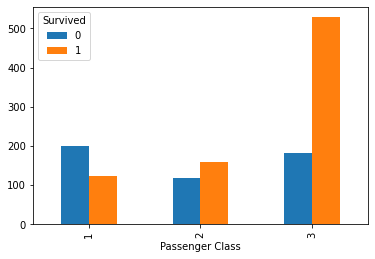

In [45]:
pd.crosstab(df_clean['Passenger Class'],df_clean['Survived']).plot(kind='bar')

<AxesSubplot:xlabel='Sex'>

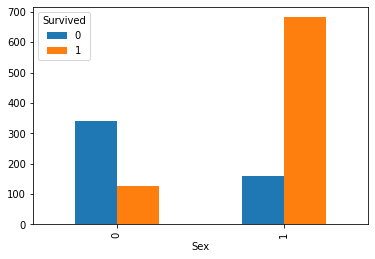

In [46]:
pd.crosstab(df_clean['Sex'],df_clean['Survived']).plot(kind='bar')

# HOMEWORK_Week#5

# Ex. 1

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv', sep=',', header = 0) 
df

,hn,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
0,2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2,2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
4,2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
1719,3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1720,2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1721,3302539,44,3,0.0,0.0,0,1,1.0,0.0,5.0,...,15.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# Set index of data to hn numbers
df_set = df
df_set = df_set.set_index('hn') 
df_set

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,4.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,2.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,1.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Remove missing values
df_set.isnull()

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2633481,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2634477,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2633633,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2630496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3167041,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2623351,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False


In [51]:
df_clean = df_set.dropna(0, 'any') 
df_clean

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2450167,67,5,0.0,1.0,1,0,0.0,3.0,2.0,4.0,...,34.0,38.0,3.0,3.7,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,57,2,0.0,1.0,1,1,1.0,0.0,5.0,4.0,...,18.0,0.0,3.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
3813471,42,2,0.0,0.0,1,0,0.0,3.0,2.0,4.0,...,33.0,999.0,3.0,2.7,0.0,2.0,1.0,1.0,1.0,0.0
3812935,53,1,0.0,1.0,1,0,1.0,0.0,5.0,4.0,...,17.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
# Remove these unnecessary columns hiv, size, utmet, vgmet, surgery, pchemo
df_clean.columns

Index(['age', 'parity', 'hiv', 'menopaus', 'disease', 'surgery', 'conization',
       'OPDsize', 'appearance', 'stage', 'pchemo', 'Wardsize', 'finalhisto',
       'nodeyiel', 'RHlvsi', 'depth', 'size', 'utmet', 'vgmargin', 'vgmet',
       'pelvicme', 'pmmet', 'adnmet'],
      dtype='object')

In [54]:
df_clean = df_clean.drop(['hiv', 'size', 'utmet', 'vgmet', 'surgery', 'pchemo'],1)
df_clean.columns

Index(['age', 'parity', 'menopaus', 'disease', 'conization', 'OPDsize',
       'appearance', 'stage', 'Wardsize', 'finalhisto', 'nodeyiel', 'RHlvsi',
       'depth', 'vgmargin', 'pelvicme', 'pmmet', 'adnmet'],
      dtype='object')

In [55]:
# Change age into 2 values 'Young' (age <= 20) and 'Old' (age > 20)

df_age = df_clean
df_age.loc[df_age['age']<=20, 'age'] = 'Young'
df_age.loc[df_age['age']>20, 'age'] = 'Old'
df_age

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,Old,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,Old,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


In [57]:
# Separate data into groups based on pmmet values
# pmmet = 0

pmmet0 = df_age.loc[df_age['pmmet']==0.0]
pmmet0

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810768,Old,1,0.0,1,0.0,3.0,1.0,4.0,3.0,1.0,15.0,0.0,3.0,0.0,0.0,0.0,0.0
3812586,Old,2,1.0,1,0.0,3.0,1.0,4.0,3.0,1.0,32.0,7.0,3.0,0.0,0.0,0.0,0.0
3807672,Old,7,0.0,1,0.0,4.0,1.0,4.0,4.0,2.0,17.0,1.0,3.0,0.0,0.0,0.0,0.0


In [59]:
# pmmet = 1

pmmet1 = df_age.loc[df_age['pmmet']==1.0]
pmmet1

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2635600,Old,2,0.0,0,0.0,3.0,2.0,4.0,3.0,1.0,18.0,10.0,3.0,0.0,1.0,1.0,2.0
2634755,Old,2,0.0,0,0.0,4.0,4.0,4.0,4.0,1.0,20.0,999.0,3.0,0.0,1.0,1.0,0.0
2647653,Old,1,0.0,1,0.0,6.0,1.0,5.0,6.0,1.0,14.0,5.0,3.0,0.0,1.0,1.0,0.0
2648037,Old,2,0.0,0,0.0,2.0,1.0,6.0,2.0,1.0,28.0,1.0,3.0,0.0,0.0,1.0,0.0
2657353,Old,5,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,26.0,10.0,3.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484711,Old,0,0.0,0,0.0,4.0,1.0,4.0,3.0,2.0,10.0,999.0,3.0,0.0,1.0,1.0,0.0
3810771,Old,1,0.0,0,1.0,3.0,2.0,4.0,3.0,1.0,23.0,10.0,3.0,0.0,0.0,1.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0


In [60]:
# for each group, randomly choose 10 data

pmmet0.sample(10)

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
3175082,Old,4,0.0,1,0.0,2.0,1.0,4.0,3.0,1.0,22.0,0.0,3.0,0.0,0.0,0.0,0.0
2715887,Old,3,0.0,1,0.0,3.0,1.0,4.0,2.5,3.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0
2737569,Old,1,0.0,0,0.0,3.0,1.0,4.0,2.0,2.0,20.0,0.0,2.0,0.0,0.0,0.0,2.0
2792939,Old,2,1.0,0,1.0,0.0,5.0,1.0,0.0,1.0,33.0,0.0,2.0,0.0,0.0,0.0,2.0
2875312,Old,2,1.0,0,0.0,3.0,2.0,4.0,2.5,1.0,23.0,3.0,2.0,0.0,0.0,0.0,0.0
2862390,Old,2,0.0,0,0.0,4.0,2.0,5.0,4.0,1.0,31.0,6.0,3.0,0.0,0.0,0.0,0.0
3010326,Old,4,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,26.0,13.0,3.0,0.0,0.0,0.0,0.0
2729208,Old,4,1.0,1,1.0,0.0,5.0,3.0,0.0,1.0,20.0,0.0,3.0,0.0,0.0,0.0,0.0
3263296,Old,5,1.0,0,0.0,5.0,3.0,5.0,3.0,1.0,16.0,999.0,3.0,0.0,1.0,0.0,0.0


In [62]:
pmmet1.sample(10)

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
3020159,Old,2,0.0,0,1.0,2.0,2.0,4.0,2.0,1.0,23.0,4.0,3.0,1.0,0.0,1.0,2.0
3268546,Old,2,0.0,0,0.0,6.0,1.0,6.0,6.0,4.0,23.0,999.0,3.0,0.0,0.0,1.0,0.0
2917010,Old,1,0.0,1,0.0,3.0,2.0,4.0,4.0,2.0,19.0,7.0,3.0,0.0,0.0,1.0,0.0
3812935,Old,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0
2446015,Old,2,0.0,1,0.0,5.0,1.0,5.0,5.0,1.0,13.0,999.0,3.0,0.0,1.0,1.0,0.0
2794452,Old,3,1.0,0,0.0,2.5,2.0,4.0,3.0,3.0,14.0,0.0,2.0,0.0,1.0,1.0,0.0
2715990,Old,4,0.0,0,0.0,2.0,2.0,4.0,2.0,1.0,24.0,6.0,3.0,0.0,0.0,1.0,2.0
3593456,Old,1,0.0,1,0.0,6.0,1.0,6.0,6.0,1.0,22.0,1.0,3.0,0.0,1.0,1.0,0.0
3082211,Old,2,0.0,0,0.0,7.0,1.0,5.0,4.0,3.0,20.0,8.0,3.0,2.0,1.0,1.0,0.0


# Ex. 2 

In [63]:
df_test = df

<AxesSubplot:xlabel='hiv'>

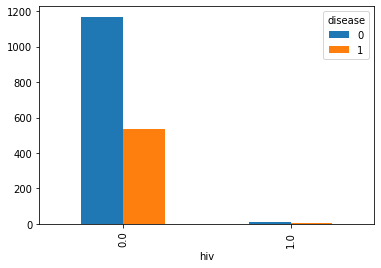

In [66]:
# 2.1
pd.crosstab(df_test['hiv'],df_test['disease']).plot(kind='bar')

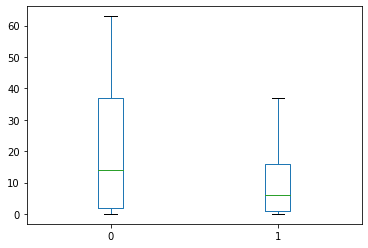

In [67]:
# 2.2
df_disease = pd.crosstab(df_test['age'],df_test['disease'])
df_disease.plot.box();

<AxesSubplot:xlabel='age'>

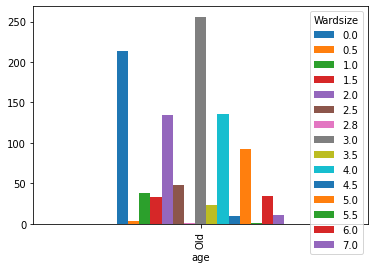

In [68]:
# 2.3 
pd.crosstab(df_clean['age'],df_clean['Wardsize']).plot(kind='bar')

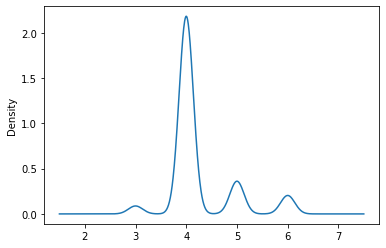

In [69]:
# 2.4 
df_nodeyiel = pd.Series(df_test['stage'],df_test['nodeyiel'])
df_nodeyiel.plot.kde();

<AxesSubplot:xlabel='age'>

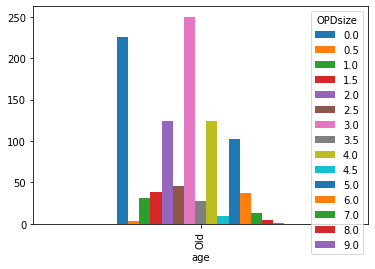

In [71]:
# 2.5
pd.crosstab(df_clean['age'],df_clean['OPDsize']).plot(kind='bar')